## **Set up environment**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Import and Exploratory**

In [2]:
df = pd.read_csv('Online Retail.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
## check data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338635 entries, 0 to 338634
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    338635 non-null  object 
 1   StockCode    338635 non-null  object 
 2   Description  338182 non-null  object 
 3   Quantity     338634 non-null  float64
 4   InvoiceDate  338634 non-null  object 
 5   UnitPrice    338634 non-null  float64
 6   CustomerID   246251 non-null  float64
 7   Country      338634 non-null  object 
dtypes: float64(3), object(5)
memory usage: 20.7+ MB


In [4]:
## check missing data

df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      453
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     92384
Country            1
dtype: int64

In [5]:
## check duplication

df.nunique()

InvoiceNo      13971
StockCode       3712
Description     3781
Quantity         311
InvoiceDate    12925
UnitPrice       1069
CustomerID      3456
Country           37
dtype: int64

In [6]:
## describe data

df.describe()

,Quantity,UnitPrice,CustomerID
count,338634.000000,338634.000000,246251.000000
mean,10.802102,4.012153,15288.637212
std,134.236793,39.208743,1725.823092
min,1.000000,0.000000,12346.000000
25%,1.000000,1.250000,13869.000000
50%,3.000000,2.100000,15159.000000
75%,11.000000,4.130000,16814.000000
max,74215.000000,13541.330000,18287.000000


In [7]:
## data preparation

df['Amount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date
df['CustomerID'] = df['CustomerID'].astype(str)
df['Month'] = df['Date'].apply(lambda x : x.replace(day=1))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


## **Monthly Sales Analysis**

In [8]:
## data preparation

monthly_sales = df.groupby(by = 'Month').agg({'Amount' : 'sum',
                                              'CustomerID' : 'nunique',
                                              'InvoiceNo' : 'nunique'})
monthly_sales['TicketSize'] = monthly_sales['Amount'] / monthly_sales['InvoiceNo']
monthly_sales.columns = ['Amount', 'TotalCustomer', 'TotalTicket', 'TicketSize']
monthly_sales.reset_index(inplace=True)
monthly_sales.head()

,Month,Amount,TotalCustomer,TotalTicket,TicketSize
0,2010-12-01,823746.140,886,1629,505.675961
1,2011-01-01,691364.560,742,1120,617.289786
2,2011-02-01,523631.890,759,1126,465.037202
3,2011-03-01,717639.360,975,1531,468.738968
4,2011-04-01,537808.621,857,1318,408.049030


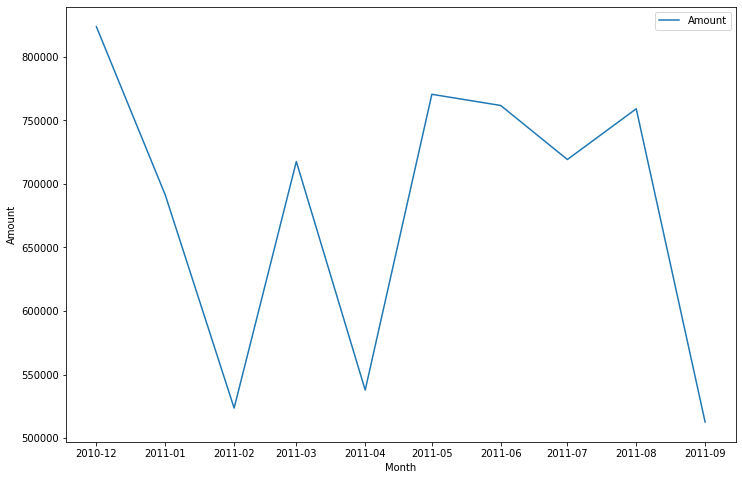

In [9]:
## plot monthly sales

plt.figure(figsize=(12,8))
sns.lineplot(x = 'Month', y = 'Amount', data = monthly_sales, label = 'Amount')

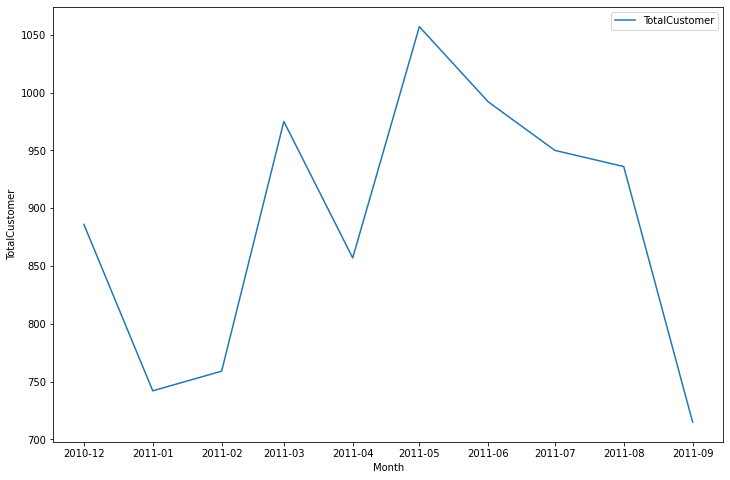

In [10]:
## plot no. of customers

plt.figure(figsize=(12,8))
sns.lineplot(x = 'Month', y = 'TotalCustomer', data = monthly_sales, label = 'TotalCustomer')

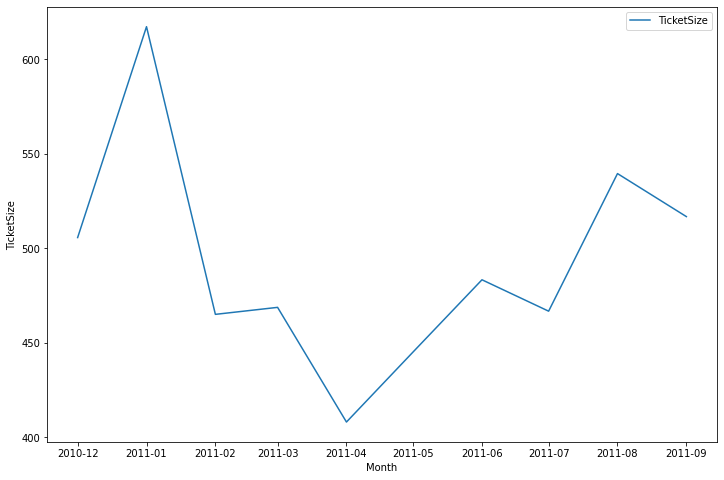

In [11]:
## plot ticket size

plt.figure(figsize=(12,8))
sns.lineplot(x = 'Month', y = 'TicketSize', data = monthly_sales, label = 'TicketSize')

## **Country Comparison**

In [12]:
## data preparation

country_sales = df.groupby(by=['Country'])[['Amount']].sum()\
                        .reset_index()\
                        .sort_values(by='Amount', ascending=False)

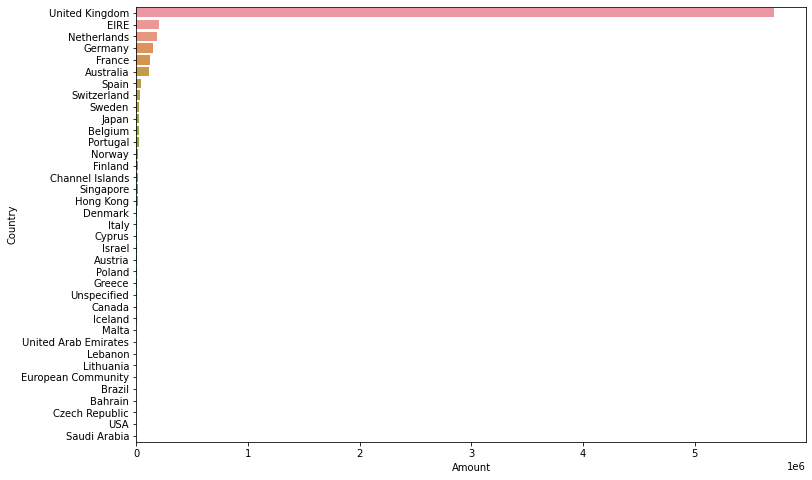

In [13]:
## plot country comparison

plt.figure(figsize=(12,8))
sns.barplot(y = 'Country', x='Amount', data = country_sales)

In [14]:
## data preparation

country_sales_no_uk = country_sales[country_sales['Country']!= 'United Kingdom']

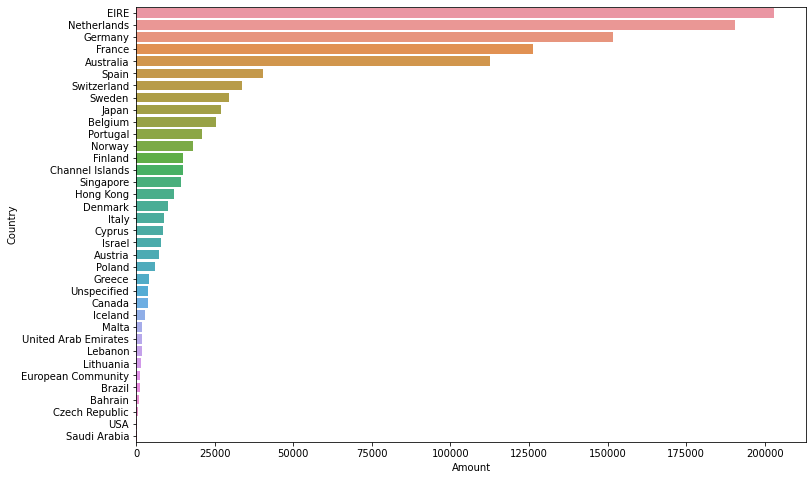

In [15]:
## plot country comparison - UK Excluded

plt.figure(figsize=(12,8))
sns.barplot(y = 'Country', x='Amount', data = country_sales_no_uk)

## **Product Portfolio**

In [16]:
## data preparation

product_sales = df.groupby(by=['Description'])[['Amount','Quantity']].sum()

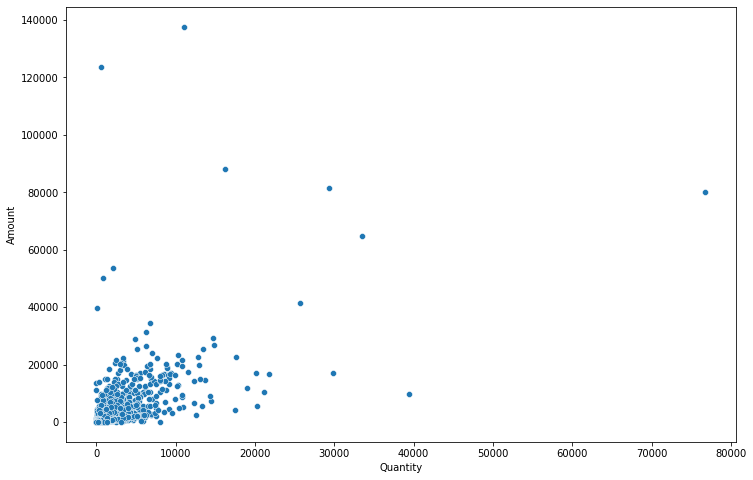

In [17]:
## plot product portfolio

plt.figure(figsize=(12,8))
sns.scatterplot(x='Quantity', y='Amount', data=product_sales)

## **Dashboard**

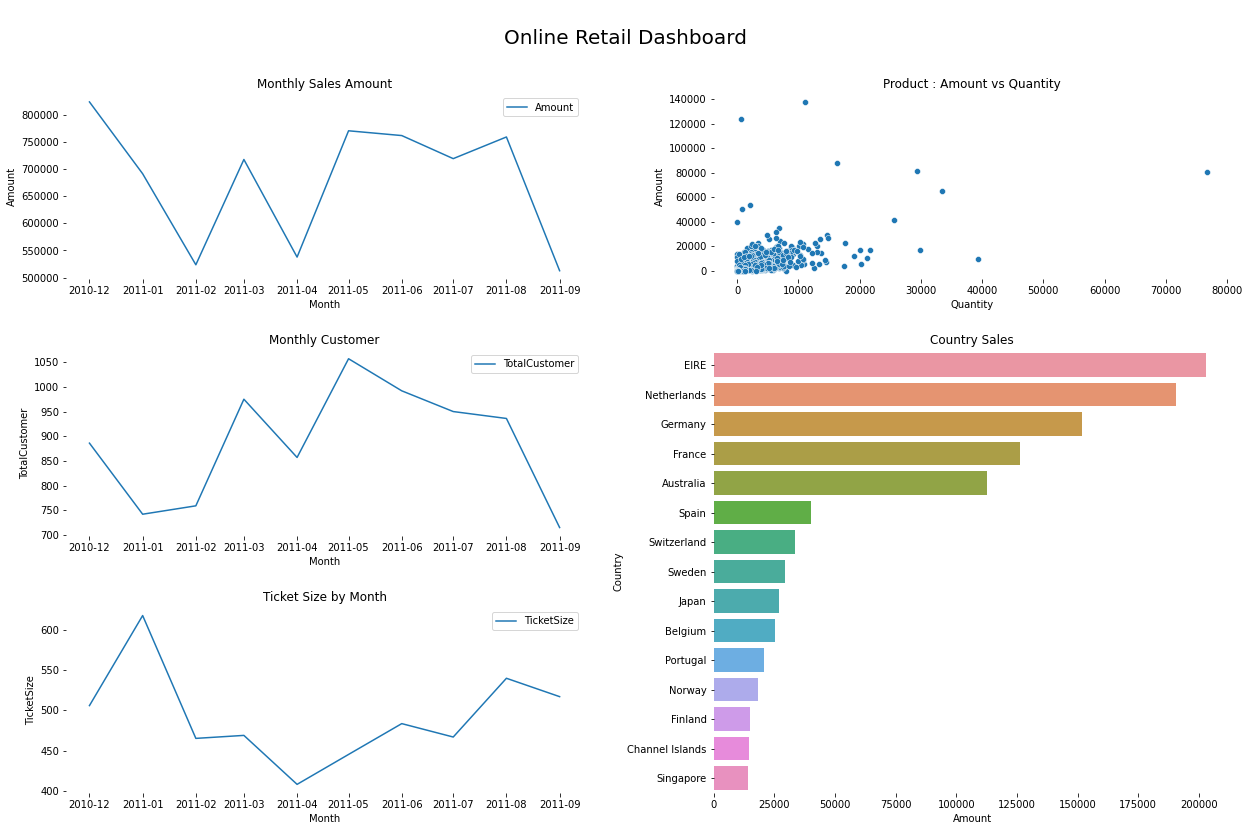

In [18]:
fig, ax = plt.subplots(3, 2, figsize=(18,12))
gs = ax[1, 1].get_gridspec()
for a in ax[1:, -1]:
    a.remove()
axbig = fig.add_subplot(gs[1:, -1])

sns.lineplot(x = 'Month', y = 'Amount', data = monthly_sales, label = 'Amount', ax = ax[0,0])
sns.lineplot(x = 'Month', y = 'TotalCustomer', data = monthly_sales, label = 'TotalCustomer', ax = ax[1,0])
sns.lineplot(x = 'Month', y = 'TicketSize', data = monthly_sales, label = 'TicketSize', ax = ax[2,0])
sns.scatterplot(x='Quantity', y='Amount', data=product_sales, ax = ax[0,1])
sns.barplot(y = 'Country', x='Amount', data = country_sales_no_uk.head(15), ax= axbig)

ax[0,0].set_title('Monthly Sales Amount')
ax[1,0].set_title('Monthly Customer')
ax[2,0].set_title('Ticket Size by Month')
ax[0,1].set_title('Product : Amount vs Quantity')
axbig.set_title('Country Sales')

plt.tight_layout(pad=3.0)
fig.suptitle('\nOnline Retail Dashboard', fontsize=20)
fig.subplots_adjust(top=0.88)
sns.despine(bottom = True, left = True)


plt.show()